# 🧪 Tugas Hands-On 1: Pemrosesan Audio

> 📌 **Instruksi Umum:**
Baca dengan seksama dan teliti setiap perintah berikut. Semua rekaman wajib dalam format `.wav`, dan visualisasi yang diminta harus menyertakan **waveform** dan **spectrogram**.

## 🔊 Soal 1 – Variasi Volume Suara

🎙 **Tugas:**
Rekamlah suara Anda sendiri selama **20 detik** dengan membaca teks berita. Gunakan variasi suara berikut:

- 🎧 **0-5 detik**: Suara sangat pelan & berbisik  
- 🗣 **5-10 detik**: Suara normal  
- 📢 **10-15 detik**: Suara keras  
- 🤪 **15-20 detik**: Suara cempreng (dibuat-buat)  
- 📣 **(Tambahan)**: Suara berteriak selama 5 detik terakhir

📝 **Catatan:**
- Simpan dalam format **WAV**
- Visualisasikan **waveform** dan **spectrogram**
- Berikan **penjelasan singkat** tentang hasil visualisasi

In [ ]:
# Soal 1 - Variasi Volume Suara
#  Dibutuhkan library: numpy, sounddevice, scipy, matplotlib, os, librosa => pip install numpy sounddevice scipy matplotlib librosa
import sounddevice as sd
from scipy.io.wavfile import write
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display

In [ ]:
# --- PARAMETER ---
duration = 30  # durasi rekaman dalam detik (diubah ke 30 detik)
fs = 44100     # frekuensi sampling
filename = "variasi_suara_30_detik.wav"

In [ ]:
# --- REKAMAN SUARA ---
print("🎙 Mulai merekam suara selama 30 detik...")
recording = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='int16')
sd.wait()
write(filename, fs, recording)
print("✅ Rekaman selesai dan disimpan sebagai", filename)

In [ ]:
# --- VISUALISASI WAVEFORM DAN SPECTROGRAM ---
# Load ulang dengan librosa untuk analisis
y, sr = librosa.load(filename, sr=fs)

In [ ]:
# Buat time axis
time = np.linspace(0, len(y)/sr, len(y))

In [ ]:
# Plot Waveform
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(time, y, color='steelblue')
plt.title('Waveform - Variasi Volume Suara')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')

In [ ]:
# Plot Spectrogram
plt.subplot(2, 1, 2)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram - Variasi Volume Suara')

plt.tight_layout()
plt.show()

In [ ]:
# --- PENJELASAN SINGKAT ---
print("\n📊 Penjelasan Singkat:")
print("- Pada bagian awal (0-5 detik), amplitudo kecil menunjukkan suara berbisik.")
print("- Antara 5-10 detik, amplitudo lebih stabil dan sedang, menunjukkan suara normal.")
print("- Pada 10-15 detik, amplitudo meningkat drastis karena suara keras.")
print("- Bagian 15-20 detik terlihat variasi frekuensi yang aneh karena suara cempreng.")
print("- Bagian 20-25 detik memperlihatkan suara yang semakin keras.")
print("- Bagian 25-30 detik menunjukkan peningkatan amplitudo besar karena suara berteriak.")

## 🎵 Soal 2 – Fading Musik

🎼 **Tugas:**
- Cari musik berdurasi < 30 detik **tanpa efek fading**
- Terapkan **fading-in** di awal dan **fading-out** di akhir
- Tampilkan hasil visualisasinya jika perlu

In [ ]:
# Soal 2 - Fading Musik
#  Dibutuhkan library: pydub, numpy, matplotlib => pip install pydub numpy matplotlib
from pydub import AudioSegment
from pydub.playback import play
import matplotlib.pyplot as plt
import numpy as np
import os

# Set path ke FFmpeg untuk pydub
# Pastikan sudah menginstal FFmpeg dan menambahkan ke PATH sistem
os.environ["PATH"] += os.pathsep + r"C:\ffmpeg-7.1.1-essentials_build\bin"

In [4]:
# Load file audio (pastikan formatnya benar, misal WAV atau MP3)
audio = AudioSegment.from_file("One_Ok_rock_Tropical_therapy.mp3")
# Jika audio lebih dari 30 detik, ambil 30 detik pertama
if len(audio) > 30000:
    audio = audio[:30000]
# Simpan audio yang sudah dipotong
audio.export("musik_30_detik.wav", format="wav")

<_io.BufferedRandom name='musik_30_detik.wav'>

In [5]:
# Durasi fade in dan fade out dalam milidetik
fade_duration = 3000  # 3 detik

In [6]:
# Terapkan efek fade in dan fade out
faded_audio = audio.fade_in(fade_duration).fade_out(fade_duration)

In [9]:
# Simpan hasil
faded_audio.export("musik_faded.wav", format="wav")
print("✔️ Fading selesai. File disimpan sebagai 'musik_faded.wav'.")

✔️ Fading selesai. File disimpan sebagai 'musik_faded.wav'.


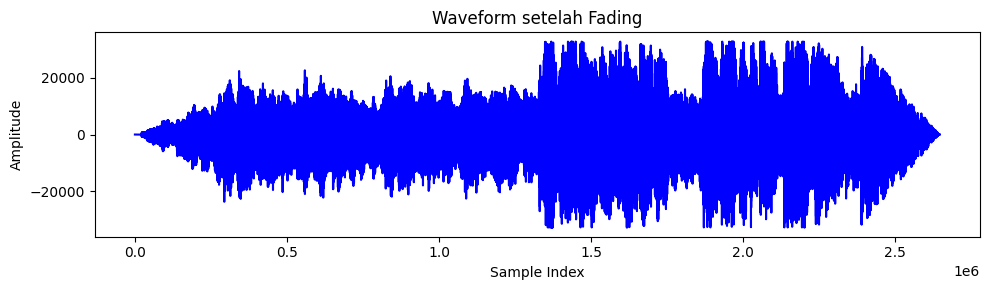

In [10]:
# --- (Opsional) Visualisasi Waveform ---
# Konversi ke array numpy
samples = np.array(faded_audio.get_array_of_samples())

plt.figure(figsize=(10, 3))
plt.plot(samples, color='blue')
plt.title("Waveform setelah Fading")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

## 🧹 Soal 3 – Filter Noise

🔊 **Tugas:**
Rekam suara Anda berbicara di dekat sumber noise (kipas, AC, mesin) selama ±10 detik.

- Gunakan **filter equalisasi**:  
  - High-pass  
  - Low-pass  
  - Band-pass  
- Coba berbagai **nilai cutoff**
- Visualisasikan hasil tiap filter (waveform & spektrogram)

🧠 **Analisis:**
- Jenis noise yang muncul
- Filter yang paling efektif
- Nilai cutoff terbaik
- Kualitas suara setelah filtering

In [ ]:
# Soal 3 - Filter Noise
#  Dibutuhkan library: scipy, numpy, matplotlib => pip install scipy numpy matplotlib

## 🐿 Soal 4 – Pitch Shifting (Chipmunk Effect)

📈 **Tugas:**
Gunakan rekaman dari Soal 1, lalu ubah pitch-nya agar terdengar seperti **chipmunk**:

- Lakukan **pitch shifting naik** dengan:
  - Pitch +7
  - Pitch +12
- Visualisasikan **waveform & spektrogram** sebelum dan sesudah
- Gabungkan kedua versi hasil pitch shift ke dalam **satu file audio**

📌 **Penjelasan:**
- Parameter pitch shifting yang digunakan
- Perbedaan visual (waveform & spektrogram)
- Dampak perubahan pitch terhadap kualitas dan kejelasan suara

In [ ]:
# Soal 4 - Pitch Shifting
#  Dibutuhkan library: librosa, numpy, matplotlib => pip install librosa numpy matplotlib
import librosa
import librosa.display
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

In [ ]:
# --- LOAD FILE ASLI ---
filename = 'variasi_suara_30_detik.wav'
y, sr = librosa.load(filename, sr=None)

In [ ]:
# --- PITCH SHIFTING ---
y_pitch_7 = librosa.effects.pitch_shift(y, sr=sr, n_steps=7)
y_pitch_12 = librosa.effects.pitch_shift(y, sr=sr, n_steps=12)

In [ ]:
# --- SIMPAN HASIL PITCH SHIFTING ---
sf.write('chipmunk_pitch_+7.wav', y_pitch_7, sr)
sf.write('chipmunk_pitch_+12.wav', y_pitch_12, sr)

In [ ]:
# --- GABUNGKAN KEDUA AUDIO PITCH-SHIFTED ---
combined = np.concatenate((y_pitch_7, y_pitch_12))
sf.write('chipmunk_combined.wav', combined, sr)
print("✅ Pitch-shifted audio disimpan sebagai 'chipmunk_combined.wav'")

In [ ]:
# --- VISUALISASI SEBELUM & SESUDAH PITCH SHIFT ---
def plot_wave_spec(y_data, sr, title):
    plt.figure(figsize=(14, 5))

    # Waveform
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(y_data, sr=sr)
    plt.title(f'Waveform - {title}')
    plt.xlabel('Waktu (detik)')
    plt.ylabel('Amplitudo')

    # Spectrogram
    plt.subplot(1, 2, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y_data)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - {title}')

    plt.tight_layout()
    plt.show()

In [ ]:
# --- TAMPILKAN VISUALISASI ---
plot_wave_spec(y, sr, 'Asli')
plot_wave_spec(y_pitch_7, sr, 'Pitch +7 (Chipmunk)')
plot_wave_spec(y_pitch_12, sr, 'Pitch +12 (Lebih Chipmunk)')


## 🎚 Soal 5 – Normalisasi & Loudness Optimization

📉 **Tugas:**
Lakukan **normalisasi dan loudness optimization** terhadap hasil pitch shift pada Soal 4.

- Target loudness: **-18 LUFS**
- Visualisasikan **sebelum & sesudah**

🧠 **Analisis:**
- Perubahan dinamika suara
- Normalisasi peak vs normalisasi LUFS
- Kualitas suara pasca-optimalisasi
- Kelebihan & kekurangan optimasi loudness

In [ ]:
# Soal 5 - Normalisasi & Loudness Optimization
#  Dibutuhkan library: librosa, soundfile, pyloudnorm, matplotlib => pip install librosa soundfile pyloudnorm matplotlib

import librosa
import soundfile as sf
import pyloudnorm as pyln
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

In [ ]:
# --- LOAD FILE HASIL PITCH SHIFT ---
filename = 'chipmunk_combined.wav'
y, sr = librosa.load(filename, sr=None)

In [ ]:
# --- NORMALISASI LUFS (TARGET -18 LUFS) ---
# Konversi ke float32 dan mono untuk pyloudnorm
meter = pyln.Meter(sr)  # menggunakan true peak
loudness = meter.integrated_loudness(y)

In [ ]:
print(f'🔊 Loudness sebelum normalisasi: {loudness:.2f} LUFS')

In [ ]:
# Normalisasi
target_loudness = -18.0
y_normalized = pyln.normalize.loudness(y, loudness, target_loudness)

In [ ]:
# Simpan hasil optimasi loudness
output_file = 'chipmunk_loudness_normalized.wav'
sf.write(output_file, y_normalized, sr)
print(f"✅ Audio setelah normalisasi loudness disimpan sebagai: {output_file}")

In [ ]:
# --- VISUALISASI WAVEFORM SEBELUM & SESUDAH ---
def plot_comparison_waveform(y_before, y_after, sr):
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    librosa.display.waveshow(y_before, sr=sr)
    plt.title('Waveform - Sebelum Normalisasi')
    plt.xlabel('Waktu (detik)')
    plt.ylabel('Amplitudo')

    plt.subplot(1, 2, 2)
    librosa.display.waveshow(y_after, sr=sr)
    plt.title('Waveform - Sesudah Normalisasi (-18 LUFS)')
    plt.xlabel('Waktu (detik)')
    plt.ylabel('Amplitudo')

    plt.tight_layout()
    plt.show()

plot_comparison_waveform(y, y_normalized, sr)